# Ejercicio KNN (K- Nearest Neighbor)

### Cruz David Hernandez Antunez 15111430

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Se da lectura al archivo csv de entrada con pandas, este archivo usa separador de punto y coma, debido a que los review contienen texto que usan coma

In [2]:
dataframe=pd.read_csv('reviews_sentiment.csv', sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [3]:
# Revisamo resumen estadistico de los datos 
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


257 registros las estrellas de 1 a 5. La cantidad de palabras va desde 1 hasta 103. Las valoraciones de sentimiento estan entre-2.27 y 3.26 con una media de 0.38 y a partir de la desvacion estandar se puede observar que la mayoria esta entre 0.38 - 0.89

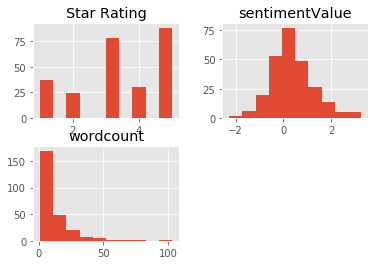

In [4]:
dataframe.hist()
plt.show()

In [36]:

print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


Graficamos la cantidad de palabras y se confirma que la mayoria esta entre 1 y 10

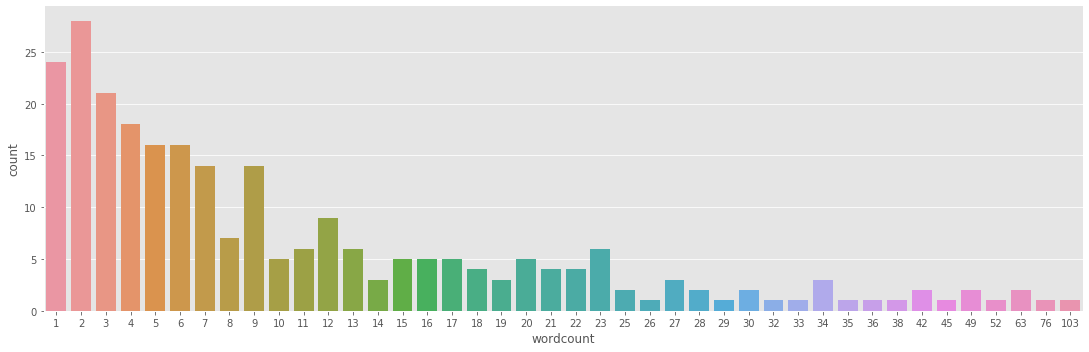

In [7]:
sb.factorplot('wordcount', data=dataframe, kind='count',aspect=3)

se prepara al conjunto de datos, generamos X y Y de entrada y los conjuntos de entrenamiento y prueba

In [8]:
x = dataframe[['wordcount', 'sentimentValue']].values
y= dataframe['Star Rating'].values

x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Se utiliza KKN con scikit Learn. se define el valor de K en 7 y se crea el clasificador

In [9]:
n_neighbors=7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Precision de KNN en los datos de entrenamiento:{:.2f}'.format(knn.score(x_train,y_train)))
print('precion de KNN en el conjunto de pruebas:{:.2f}'.format(knn.score(x_test, y_test)))

Precision de KNN en los datos de entrenamiento:0.90
precion de KNN en el conjunto de pruebas:0.86


### Nota: se utiliza la clase KNeighborsClassifier de Scikit Learn ya que las etiquetas son valores discretos (estrellas del 1 al 5). pero se debe tomar en cuenta que existe KNeighborRegressor para etiquetas con valores continuos

### Precision del modelo. se condirma la precision viendo la matrix de confusion y el reporte de conjunto de pruebas detallando aciertos y fallos


In [10]:
pred= knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



A continuacion la grafica con la clasificacion optenida como ayuda a la visualizacion de predicciones. Notasiendo 2 atributos, se hace una grafica 2D y si fueran 3, puede ser una grafica 3D. En entornos practicos, es posible mas de 3 dimensiones, es posible tener mas de 3 dimensiones

NameError: name 'mpatches' is not defined

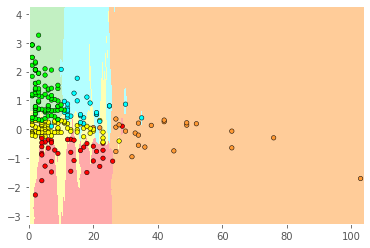

In [37]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

como obtener el mejor valor de K?

se visualizan 5 zonas en las uqe se relacionan la cantidad de palabras con el valor de sentimiento de la opinion que ingreso el usuario

se distinguen 5 regiones: roja, naranja, amarilla, azul y verde

por ejemplo una opinion de 20 palabras y sentimo 1, da una valoracion de 4(zona azul)


De estas zonas se puede deducir ciertas caracteristicas de los usuarios que usan y valor una aplicacion. Los usuarios que opinan:

1.- Estrella tiene sentimiento negativo y hasta 25 palabras

2.- estrellas: dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y positivo
3 estrellas: suelen ser neurales en sentimiento, puesto que estan en el torno al centro y hasta unas 25 palabras. 
5 estrellas: son bastante positivas (de 0.5 en adelante aprox) y ponen pocas palabras (hasta 10 palabras)

Previamente se habia asignado el valor de n_neighbors=7 como el valor de "k" y se obtuvieron buenos resultados. preo de donde salio ese valor?. El valor se selecciono despues de ejecutar el codigo que aparece a continuacion. en donde se revisan valor se selecciono despues de ejecutar el codigo que aparece a continuacion. En donde se revisa valor de k y la precision obtenida

([<matplotlib.axis.XTick at 0x1f482daf5c8>,
 <a list of 5 Text xticklabel objects>)

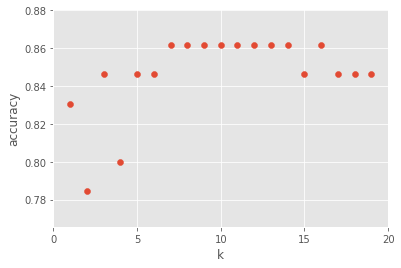

In [39]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])

En la grafica se aprecio que con los valores de K=7 a k=14 y k=16 es donde mayor precision se logra

A continuacion la grafica con la clasificacion optenida 
como ayuda a la visualizacion de predicciones. Notasiendo 2 atributos, se hace una grafica 2D y si fueran 3, puede ser una grafica 3D. En entornos practicos, es posible mas de 3 dimensiones, es posible tener mas de 3 inicializaciones

clasificar o predecir nuevas muestras. ya se obtuvo un modelo y un valor de k. Ahora, se utiliza con nuevas opiniones y se intenta predecir sus estrellas de 2 maneras. la primera

In [26]:
print(clf.predict([[5,1.0]]))

[5]


Este resultado indica que para 5 palabras y sentimientos 1, la app sera valorada con 5 estrellas